In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
diabetes_012_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_binary_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes_binary_5050split_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

# Load the CSV file
diabetes_012_health_indicators_BRFSS2015 = pd.read_csv(diabetes_012_health_indicators_BRFSS2015)
diabetes_binary_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_health_indicators_BRFSS2015)
diabetes_binary_5050split_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_5050split_health_indicators_BRFSS2015)

In [3]:
df = diabetes_binary_5050split_health_indicators_BRFSS2015

X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


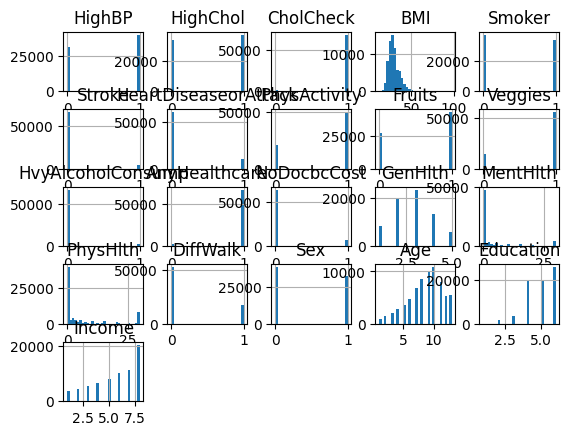

In [4]:
X.hist(bins=30)

plt.show()

### Age vs Diabetes

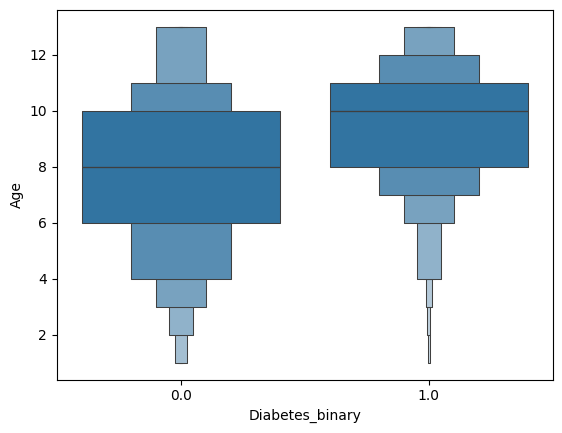

In [5]:
import seaborn as sns
sns.boxenplot(x='Diabetes_binary', y='Age', data=df)

plt.show()

### BMI vs. Diabetes

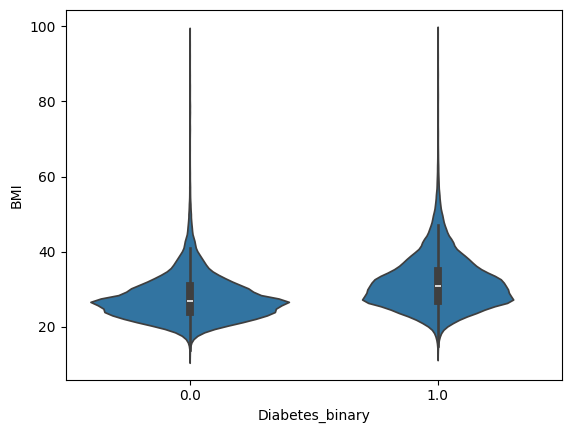

In [6]:
sns.violinplot(x='Diabetes_binary', y='BMI', data=df)

plt.show()

### Smoker vs Diabetes

In [7]:
pd.crosstab(df['Diabetes_binary'], df['Smoker'])

Smoker,0.0,1.0
Diabetes_binary,,
0.0,20065,15281
1.0,17029,18317


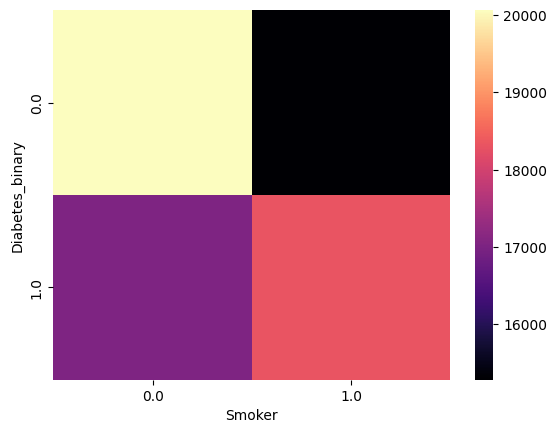

In [8]:
sns.heatmap(pd.crosstab(df['Diabetes_binary'], df['Smoker']), cmap='magma')
plt.show()

### Sex vs. Diabetes

In [9]:
pd.crosstab(df['Diabetes_binary'], df['Sex'])

Sex,0.0,1.0
Diabetes_binary,,
0.0,19975,15371
1.0,18411,16935


### HighBP vs Diabetes

In [10]:
pd.crosstab(df['Diabetes_binary'], df['HighBP'])

HighBP,0.0,1.0
Diabetes_binary,,
0.0,22118,13228
1.0,8742,26604


### Mental Health vs Diabetes

<Axes: xlabel='Diabetes_binary', ylabel='MentHlth'>

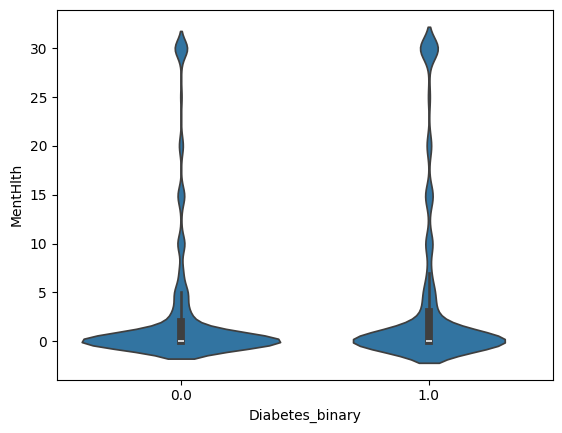

In [11]:
sns.violinplot(x='Diabetes_binary', y='MentHlth', data=df)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = [col for col in X.columns if len(X[col].unique()) >= 10]
cat_cols = [col for col in X.columns if col not in num_cols]

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

preprocessor.fit(X)
X_scaled = preprocessor.transform(X)

## Dimensionality Reduction

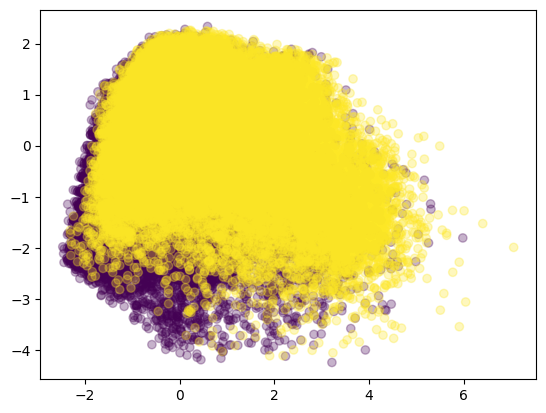

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.3)
plt.show()

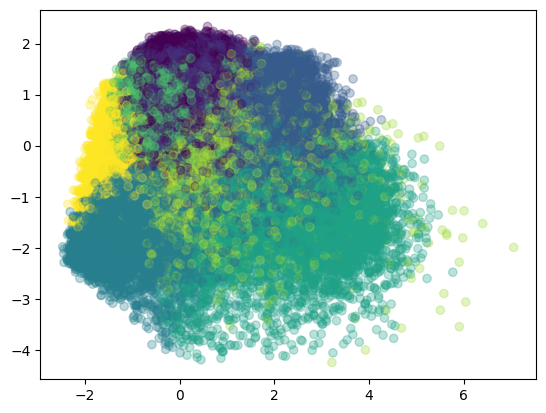

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans()

y_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, alpha=0.3)
plt.show()